In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
df = pd.read_csv('all.csv')
df =  df.drop(['All','O+','O-','B+','B-','A+','A-','AB+'], axis=1)
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df.head()

,AB-
Date,
2017-01-01,0
2017-01-02,0
2017-01-03,0
2017-01-04,0
2017-01-05,0


In [3]:
df.head()

,AB-
Date,
2017-01-01,0
2017-01-02,0
2017-01-03,0
2017-01-04,0
2017-01-05,0


In [4]:
train, test = df[:-4], df[-4:]

In [5]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [6]:
n_input = 4
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [7]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=180)

Epoch 1/180
182/182 [==============================] - 15s 81ms/step - loss: 0.0289
Epoch 2/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0286
Epoch 3/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0286
Epoch 4/180
182/182 [==============================] - 2s 9ms/step - loss: 0.0286
Epoch 5/180
182/182 [==============================] - 2s 11ms/step - loss: 0.0286
Epoch 6/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0286
Epoch 7/180
182/182 [==============================] - 2s 14ms/step - loss: 0.0285
Epoch 8/180
182/182 [==============================] - 3s 15ms/step - loss: 0.0288
Epoch 9/180
182/182 [==============================] - 3s 17ms/step - loss: 0.0285
Epoch 10/180
182/182 [==============================] - 2s 14ms/step - loss: 0.0286
Epoch 11/180
182/182 [==============================] - 2s 11ms/step - loss: 0.0286
Epoch 12/180
182/182 [==============================] - 2s 13ms/step - loss: 0.0285
E

182/182 [==============================] - 2s 9ms/step - loss: 0.0285
Epoch 100/180
182/182 [==============================] - 2s 8ms/step - loss: 0.0285
Epoch 101/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0285
Epoch 102/180
182/182 [==============================] - 2s 9ms/step - loss: 0.0285
Epoch 103/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0285
Epoch 104/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0285
Epoch 105/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0285
Epoch 106/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0285
Epoch 107/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0285
Epoch 108/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0285
Epoch 109/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0285
Epoch 110/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0285
Epoch 

In [8]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [9]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_predict.head(15)

#df.reset_index(inplace=True)
#df_predict.reset_index(inplace=True)
#df_predict.head(3)

,Prediction
Date,
2020-01-01,0.028462
2020-01-02,0.028461
2020-01-03,0.028461
2020-01-04,0.028461


In [10]:
df.head(12)

,AB-
Date,
2017-01-01,0
2017-01-02,0
2017-01-03,0
2017-01-04,0
2017-01-05,0
2017-01-06,0
2017-01-07,0
2017-01-08,0
2017-01-09,0


In [11]:
df_test = pd.concat([df,df_predict], axis=1)

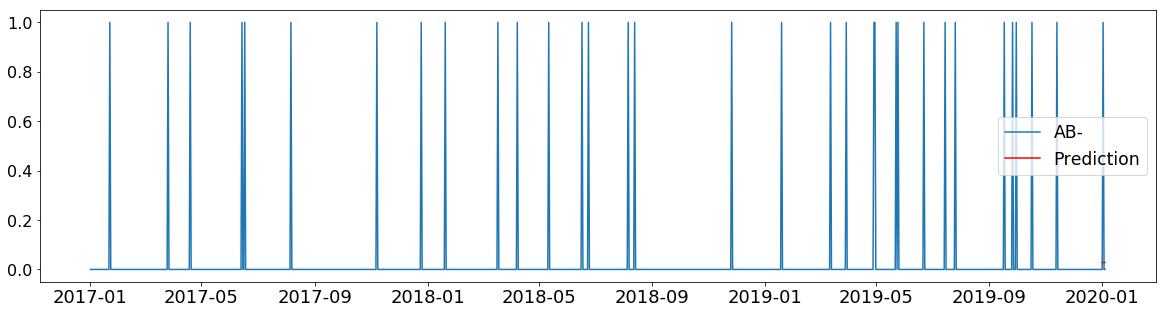

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['AB-'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [13]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [0.48639424]


In [14]:
train = df

n_input = 4
n_features = 1

scaler.fit(train)
train = scaler.transform(train)

generator = TimeseriesGenerator(train,train, length=n_input, batch_size=6)

model.fit_generator(generator, epochs=180)

pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:],[[pred_list[i]]], axis = 1)

Epoch 1/180
183/183 [==============================] - 2s 12ms/step - loss: 0.0301
Epoch 2/180
183/183 [==============================] - 2s 8ms/step - loss: 0.0300
Epoch 3/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0301
Epoch 4/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0300
Epoch 5/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0301
Epoch 6/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0301
Epoch 7/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0300
Epoch 8/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0301
Epoch 9/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0300
Epoch 10/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0301
Epoch 11/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0301
Epoch 12/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0301
Epoch 13/180

183/183 [==============================] - 2s 8ms/step - loss: 0.0300
Epoch 100/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0301
Epoch 101/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0300
Epoch 102/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0301
Epoch 103/180
183/183 [==============================] - 2s 12ms/step - loss: 0.0301
Epoch 104/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0301
Epoch 105/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0300
Epoch 106/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0301
Epoch 107/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0300
Epoch 108/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0301
Epoch 109/180
183/183 [==============================] - 2s 8ms/step - loss: 0.0301
Epoch 110/180
183/183 [==============================] - 2s 8ms/step - loss: 0.0301
Epoc

In [15]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(weeks=x) for x in range(0,5) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)
future_dates

,AB-
2020-01-11,NaN
2020-01-18,NaN
2020-01-25,NaN
2020-02-01,NaN


In [16]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)
df_proj.index.name = 'Date'


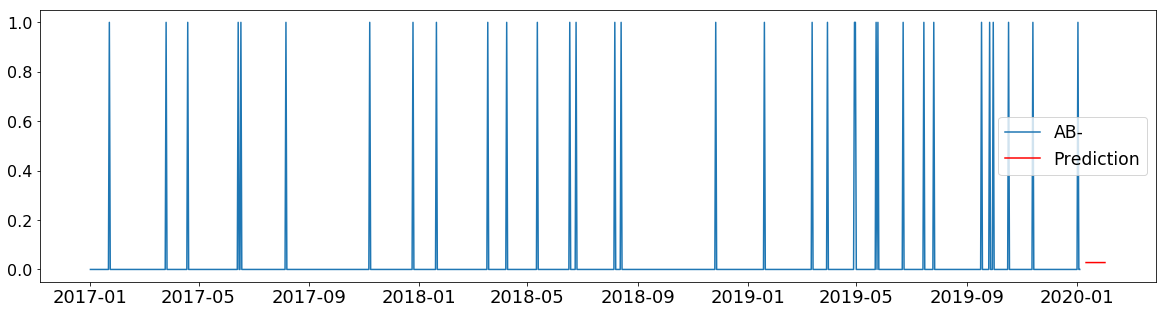

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['AB-'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [18]:
print(df_proj)
df_proj.index.name ='Date'
df_proj.reset_index(inplace=True)
print(df_proj)
df_proj['Date'].to_list()

            AB-  Prediction
Date                       
2017-01-01  0.0         NaN
2017-01-02  0.0         NaN
2017-01-03  0.0         NaN
2017-01-04  0.0         NaN
2017-01-05  0.0         NaN
2017-01-06  0.0         NaN
2017-01-07  0.0         NaN
2017-01-08  0.0         NaN
2017-01-09  0.0         NaN
2017-01-10  0.0         NaN
2017-01-11  0.0         NaN
2017-01-12  0.0         NaN
2017-01-13  0.0         NaN
2017-01-14  0.0         NaN
2017-01-15  0.0         NaN
2017-01-16  0.0         NaN
2017-01-17  0.0         NaN
2017-01-18  0.0         NaN
2017-01-19  0.0         NaN
2017-01-20  0.0         NaN
2017-01-21  0.0         NaN
2017-01-22  1.0         NaN
2017-01-23  0.0         NaN
2017-01-24  0.0         NaN
2017-01-25  0.0         NaN
2017-01-26  0.0         NaN
2017-01-27  0.0         NaN
2017-01-28  0.0         NaN
2017-01-29  0.0         NaN
2017-01-30  0.0         NaN
...         ...         ...
2019-12-10  0.0         NaN
2019-12-11  0.0         NaN
2019-12-12  0.0     

[Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-02 00:00:00'),
 Timestamp('2017-01-03 00:00:00'),
 Timestamp('2017-01-04 00:00:00'),
 Timestamp('2017-01-05 00:00:00'),
 Timestamp('2017-01-06 00:00:00'),
 Timestamp('2017-01-07 00:00:00'),
 Timestamp('2017-01-08 00:00:00'),
 Timestamp('2017-01-09 00:00:00'),
 Timestamp('2017-01-10 00:00:00'),
 Timestamp('2017-01-11 00:00:00'),
 Timestamp('2017-01-12 00:00:00'),
 Timestamp('2017-01-13 00:00:00'),
 Timestamp('2017-01-14 00:00:00'),
 Timestamp('2017-01-15 00:00:00'),
 Timestamp('2017-01-16 00:00:00'),
 Timestamp('2017-01-17 00:00:00'),
 Timestamp('2017-01-18 00:00:00'),
 Timestamp('2017-01-19 00:00:00'),
 Timestamp('2017-01-20 00:00:00'),
 Timestamp('2017-01-21 00:00:00'),
 Timestamp('2017-01-22 00:00:00'),
 Timestamp('2017-01-23 00:00:00'),
 Timestamp('2017-01-24 00:00:00'),
 Timestamp('2017-01-25 00:00:00'),
 Timestamp('2017-01-26 00:00:00'),
 Timestamp('2017-01-27 00:00:00'),
 Timestamp('2017-01-28 00:00:00'),
 Timestamp('2017-01-

In [19]:
df_proj['Date']=df_proj['Date'].astype(str)
x= df_proj['Date'].to_list()
x[-14:]

['2019-12-26',
 '2019-12-27',
 '2019-12-28',
 '2019-12-29',
 '2019-12-30',
 '2019-12-31',
 '2020-01-01',
 '2020-01-02',
 '2020-01-03',
 '2020-01-04',
 '2020-01-11',
 '2020-01-18',
 '2020-01-25',
 '2020-02-01']

In [20]:
import pickle
pickle.dump(model, open('LSTMTS.pkl','wb'))

In [21]:
model1 = pickle.load(open('LSTMTS.pkl','rb'))
print(df_predict)
#print(model.predict([[294.4631853,269.2113163,259.0677778,801.762786,10,857728.9379,2.31E+08,6.45E+07,-1.58E-04,0.318021887,0.944691378,911.1851229,115.1132337,38754.36871,125.6205738,795.0629418,769.0343165,758.783161,802.5212002,105.7078282,109.0908925,38192.10039,99.75624612,0,0,0.739668222,0.795160951,0.39753938]]))
#print(model.score(X_test,y_test))

            Prediction
2020-01-11    0.027879
2020-01-18    0.027879
2020-01-25    0.027879
2020-02-01    0.027879


In [22]:
import joblib

joblib.dump(scaler, "AB-data_transformer.joblib")
model.save("AB-model.h5")

In [23]:
from datetime import timedelta, date
EndDate = date.today() + timedelta(days=7)
